# Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project will investigate a dataset containing information collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. The original source of the dataset is [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments). 

Below is a description of each attribute in this dataset:

| Attribute | Description |
| :- | :- |
| PatientId | Identification of a patient | 
| AppointmentID | Identification of each appointment |
| Gender | Male or Female |
| ScheduledDay | The day the patient set up their appointment |
| AppointmentDay | The day of the actual appointment  |
| Age | How old is the patient |
| Neighbourhood | Indicates the location of the hospital |
| Scholarship | True or false value indicating whether or not the patient is enrolled in Brasilian welfare program Bolsa Família |
| Hipertension | True or false |
| Diabetes | True or false |
| Alcoholism | True or false |
| Handcap | True or false |
| SMS_received | 1 or more messages sent to the patient |
| No-show | Yes or no. ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. |

In our investigation we will try explore and answer the following three questions:  
&nbsp;&nbsp;**1. Does receiving an SMS reminder message increase a patient's show up rate?**  
&nbsp;&nbsp;**2. Is alcoholism associated with higher absenteeism?**  
&nbsp;&nbsp;**3. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**  


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

This section will inspect and look for instances of missing or possibly errant data, and then perform the necessary cleaning.

### General Properties
This part will explore the data and notedown any observations.

In [2]:
# Load dataset
df = pd.read_csv('noshowappointments.csv')

# View the top 5 rows of the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the first look at the dataframe we notice some typos in the labels e.g. Hipertension. Those will be corrected later in the cleaning section.

In [3]:
# Get some info about the data
print('The shape of the dataframe is {}'.format(df.shape))

The shape of the dataframe is (110527, 14)


In [4]:
# look at data types and any inconsistencies 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From above we can see that there are no null values. We can also notice that the data type of ScheduledDay and AppointmentDay is a string so we will convert them to datetime to use them easily in our investigation.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Taking a quick glance at above we can notice that the minimum age is -1 which is not a possible value for an age.
So let us inspect that a little further.

In [6]:
df[df['Age'] <=0]['Age'].count()

3540

In [7]:
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

There are 3540 ages of -1 and 0 which are not possible values for an age; therefore, they will be dropped from our dataframe. 

In [8]:
# Inspect the values of the rest of the columns 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

The time of the actual appointment is always 00:00:00 and therefore it will be ignored. I will also ignore the time of the scheduled appointment as it will not be of an importance since the actual appointment time is not recorded. 

In [10]:
# Print the unique values of the remaining columns
labels = ['Gender','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
for i in labels:
    print('The unique values in {} are {}'.format(i, df[i].unique()))


The unique values in Gender are ['F' 'M']
The unique values in Scholarship are [0 1]
The unique values in Hipertension are [1 0]
The unique values in Diabetes are [0 1]
The unique values in Alcoholism are [0 1]
The unique values in Handcap are [0 1 2 3 4]
The unique values in SMS_received are [0 1]
The unique values in No-show are ['No' 'Yes']


From above, the values of the rest of the columns seems to be reasonable.

In [11]:
# Check for duplicated records 
df.duplicated().sum()

0

There aren’t any duplicates in our dataframe 

### Data Cleaning

In this part we will perform the necessary cleaning and trimming of data based on our observations in the previous section. Below is a list of the changes that will be made to the dataframe:

* Correct the typos in column names
* Drop the PatientId and AppointmentID, as they are used for identification purposes and would  not be useful in finding trends  
* Change the data type of ScheduledDay and AppointmentDay to DateTime
* Ignore the timing  of both actual and scheduled appointments and only consider the date
* Drop impossible age values (0 & -1)


In [12]:
# Print column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [13]:
# 1) Correct typos
df.rename(columns={'Hipertension': 'Hypertension',
                  'Handcap': 'Handicap',
                  'No-show':'No_show'}, inplace=True) # for consistency - was replaced with _

In [14]:
# 2) Drop the PatientId and AppointmentID
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [15]:
# 3) Change ScheduledDay and AppointmentDay to DateTime and ignore the time
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# check the new data types
print('ScheduledDay type = {}, AppointmentDay type = {}'.format(df.ScheduledDay.dtype, df.AppointmentDay.dtype))

ScheduledDay type = datetime64[ns], AppointmentDay type = datetime64[ns]


In [16]:
# 4) Ignore impossible age values 
df = df[df['Age'] > 0]

# check unique values
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          106987 non-null  object        
 1   ScheduledDay    106987 non-null  datetime64[ns]
 2   AppointmentDay  106987 non-null  datetime64[ns]
 3   Age             106987 non-null  int64         
 4   Neighbourhood   106987 non-null  object        
 5   Scholarship     106987 non-null  int64         
 6   Hypertension    106987 non-null  int64         
 7   Diabetes        106987 non-null  int64         
 8   Alcoholism      106987 non-null  int64         
 9   Handicap        106987 non-null  int64         
 10  SMS_received    106987 non-null  int64         
 11  No_show         106987 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.6+ MB


Now that we have cleaned our data and made sure all modifications have been applied correctly we can proceed to exploration.

<a id='eda'></a>
## Exploratory Data Analysis

In this section we will explore the data and try to answer our research	questions posed in the introduction.

<a id='q1'></a>
### Q1: Does receiving an SMS reminder message increase a patient's show up rate?
Let us plot the show/no-show rates of patients who received SMS messages vs. those who did not.

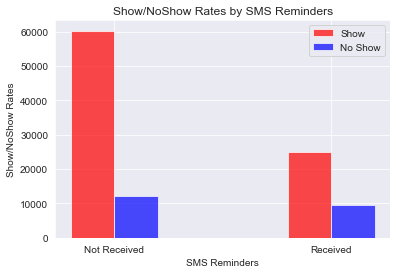

In [18]:
# SMS_received
show = df[df.No_show == 'No'].groupby(['SMS_received']).size()
noShow = df[df.No_show == 'Yes'].groupby(['SMS_received']).size()
width = 0.2
plt.bar(show.index, show, width=width, alpha=.7, color='r')
plt.bar(noShow.index + width, noShow, width=width, alpha=.7, color='b')
plt.xticks(show.index + width /2, ['Not Received', 'Received'])
plt.ylabel('Show/NoShow Rates')
plt.xlabel('SMS Reminders')
plt.title('Show/NoShow Rates by SMS Reminders')
plt.legend(['Show','No Show']);

Based on the visualisation above, patients who received SMS reminders are way less than those who did not. Therefore, let us plot the proportions.

**Note:** For the purpose of modularity and code reuse, I’ll create the following two functions:
- ratio: to be used to calculate the ratio of any given feature.
- plot_proportion_bar: a function to plot a bar chart  of show/no-show proportions of any given feature

In [21]:
# A function to calculate the ratio
def ratio(value, feature):
    return df[df.No_show == value].groupby([feature]).size()/df.groupby([feature]).size()

# A function to plot show/no-show proportions
def plot_proportion_bar(feature, width):
    plt.bar(ratio('No',feature).index, ratio('No',feature), width=0.2, alpha=.6, color='r')
    return plt.bar(ratio('Yes',feature).index + width, ratio('Yes',feature), width=0.2, alpha=.6, color='b')
    

In [22]:
print('The show up rates for patients who received an SMS message = {:.2f}%, and those who did not= {:.2f}%'.format(ratio('No','SMS_received')[1]*100,ratio('No','SMS_received')[0]*100))


The show up rates for patients who received an SMS message = 72.33%, and those who did not= 83.27%


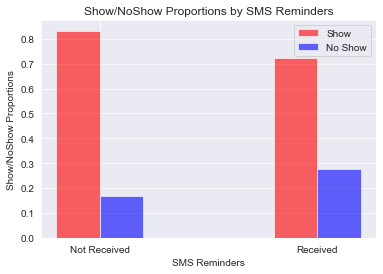

In [23]:
# Plot proportions
plot_proportion_bar('SMS_received', width)
plt.xticks(ratio('No','SMS_received').index + width /2, ['Not Received', 'Received'])
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('SMS Reminders')
plt.title('Show/NoShow Proportions by SMS Reminders')
plt.legend(['Show','No Show']);

Unlike what I expected, patients who did not receive an SMS reminder had a higher show up rate than those who received an SMS.

Based on the visualisation above, we can see that:
- Out of the +70k patients who did not receive an SMS message, more than 80% showed up to their appointments. 
- Only 72% out of 34k  patients who received an SMS, showed up to their appointments.  

So we can conclude that receiving an SMS reminder message will not increase the patient's show up rate.

<a id='q2'></a>
### Q2: Is alcoholism associated with higher absenteeism?


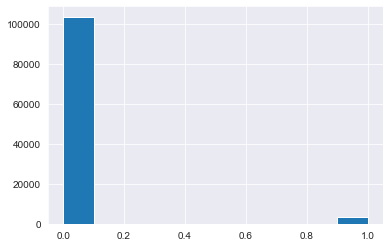

In [24]:
df.Alcoholism.hist();

According to the histogram above, there is more than 10,000 non-alcohol drinkers which is way higher than the number of drinkers. So we will use proportions.

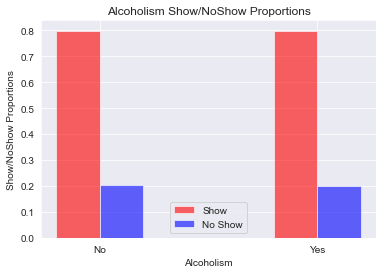

In [25]:
# Plot alcoholism show/no-show proportions
plot_proportion_bar('Alcoholism', width)
plt.xticks(ratio('No','Alcoholism').index + width /2, ['No','Yes'])
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Alcoholism')
plt.title('Alcoholism Show/NoShow Proportions')
plt.legend(['Show','No Show']);

From the visualisation above, we can see that there is no difference in the show/no-show rates between alcohol and non-alcohol consumers as both had around 80% show up rate. We can conclude that there is no correlation between no-show rate and alcoholism. Therefore, alcoholism is not associated with higher absenteeism.

### Q3: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In order to answer this question we will have to look at each variable in our dataframe:
#### 1) Gender

In [26]:
gender_count = df.groupby(['Gender', 'No_show']).size()
gender_count

Gender  No_show
F       No         55843
        Yes        14275
M       No         29464
        Yes         7405
dtype: int64

Since the number of female patients are way greater than the number of males, we will use proportions.

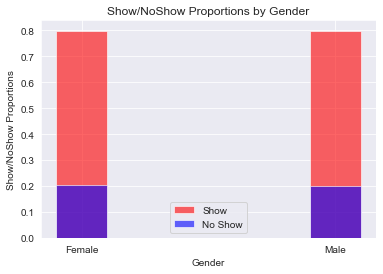

In [27]:
# Plot proportions
plot_proportion_bar('Gender', '')
plt.xticks(ratio('No','Gender').index , ['Female', 'Male'])
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Gender')
plt.title('Show/NoShow Proportions by Gender')
plt.legend(['Show','No Show']);

From the visualisation above we can see that both males and females had a show up rate of around 80%, and 20% no-show rate. Since both genders have similar rates, the gender might not be an important factor in determining whether a patient will show up for their appointment or not.

#### 2) Scheduled Day	and Appointment Day
We will look at the show/no show rates on each day of the week to check whether the appointment day has an influence on the show up rate. For that we need to introduce two additional columns representing the scheduled and the appointment day of the week.

In [28]:
# Get the day of the week
df['Schd_weekday'] = df['ScheduledDay'].dt.day_name()
df['Appointment_weekday'] = df['AppointmentDay'].dt.day_name()

In [29]:
# Check the newly added columns 
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Schd_weekday,Appointment_weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [30]:
# Get unique values
df.Schd_weekday.unique()

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

In [31]:
df.Appointment_weekday.unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

We can see that there are no appointments on Sundays, which could mean that the medical facility is closed on Sunday, or the sample data did not capture Sunday’s appointments.

In [32]:
# Check the number of scheduled appointments each day
df.Schd_weekday.value_counts()

Tuesday      25280
Wednesday    23544
Monday       22247
Friday       18374
Thursday     17520
Saturday        22
Name: Schd_weekday, dtype: int64

In [33]:
# The number of actual appointments each day
df.Appointment_weekday.value_counts()

Wednesday    25090
Tuesday      24831
Monday       21903
Friday       18465
Thursday     16659
Saturday        39
Name: Appointment_weekday, dtype: int64

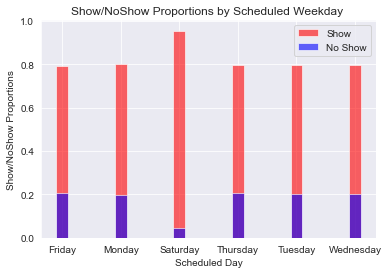

In [34]:
# Plot show/no-show proportions by the scheduled weekday 
plot_proportion_bar('Schd_weekday', '')
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Scheduled Day')
plt.title('Show/NoShow Proportions by Scheduled Weekday ')
plt.legend(['Show','No Show']);

We cannot see a clear pattern in terms of the scheduled day of the week, as most of the weekdays have similar show/no-show rates, expect for Saturday which is probably because of the small sample of appointments on Saturday (only 22).

Let us look at the show up rates of the actual appointment day of the week:

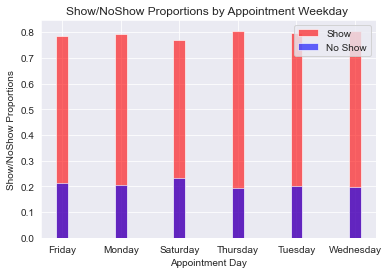

In [35]:
# Plot show/no-show proportions by the appointment weekday 
plot_proportion_bar('Appointment_weekday','')
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Appointment Day')
plt.title('Show/NoShow Proportions by Appointment Weekday ')
plt.legend(['Show','No Show']);

Based on the above the visualisation, we can notice the following:
- The show up rates are higher during week days, and lower on the weekend (Saturday).
- There are no appointments on Sunday.  

Since there is a pattern between the appointment day of the week and show up rates, we can consider it to be an important factor in determining patients show up rate.

#### 3) Age

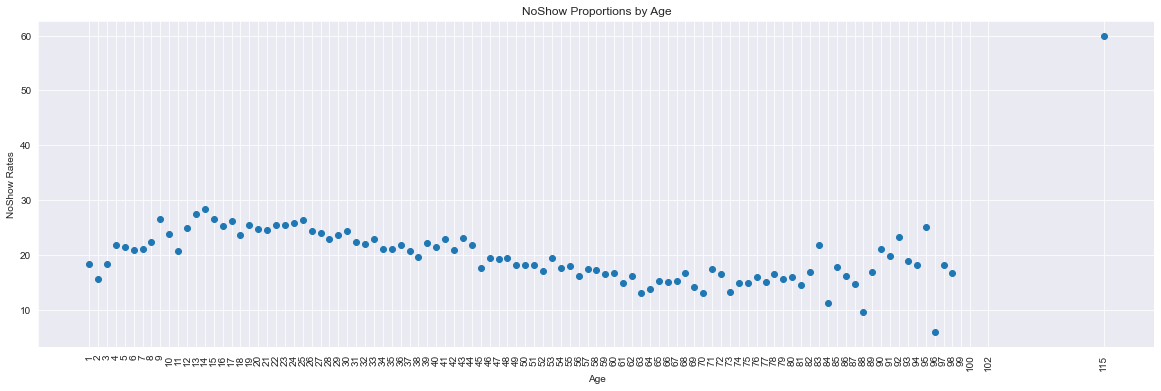

In [36]:
# Plot no-show proportions by age
age_noshow = ratio('Yes','Age')
plt.figure(figsize=(20,6))
plt.scatter(x=age_noshow.index, y=age_noshow*100)
plt.xticks(age_noshow.index, rotation='vertical')
plt.ylabel('NoShow Rates')
plt.xlabel('Age')
plt.title('NoShow Proportions by Age');

Based on the scatter plot above, we can notice the following:
- Patients who age between 12-30 years old have higher no-show rates
- Older people (60 and above) seems to have lower no-show rate.  

It is clear that there is a correlation between age and no-show rates, which makes age an important factor in determining patients show up rate.

#### 4) Neighbourhood

In [37]:
df.groupby(['Neighbourhood', 'No_show'])['Neighbourhood'].count()


Neighbourhood    No_show
AEROPORTO        No            7
                 Yes           1
ANDORINHAS       No         1686
                 Yes         509
ANTÔNIO HONÓRIO  No          212
                            ... 
TABUAZEIRO       Yes         552
UNIVERSITÁRIO    No          119
                 Yes          32
VILA RUBIM       No          690
                 Yes         139
Name: Neighbourhood, Length: 160, dtype: int64

Since some neighbourhoods have more patients than the others we will use proportions. 

In [38]:
show_proportions = ratio('No','Neighbourhood')
show_proportions

Neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.768109
ANTÔNIO HONÓRIO        0.824903
ARIOVALDO FAVALESSA    0.772388
BARRO VERMELHO         0.782297
                         ...   
SÃO JOSÉ               0.782120
SÃO PEDRO              0.788150
TABUAZEIRO             0.817158
UNIVERSITÁRIO          0.788079
VILA RUBIM             0.832328
Length: 81, dtype: float64

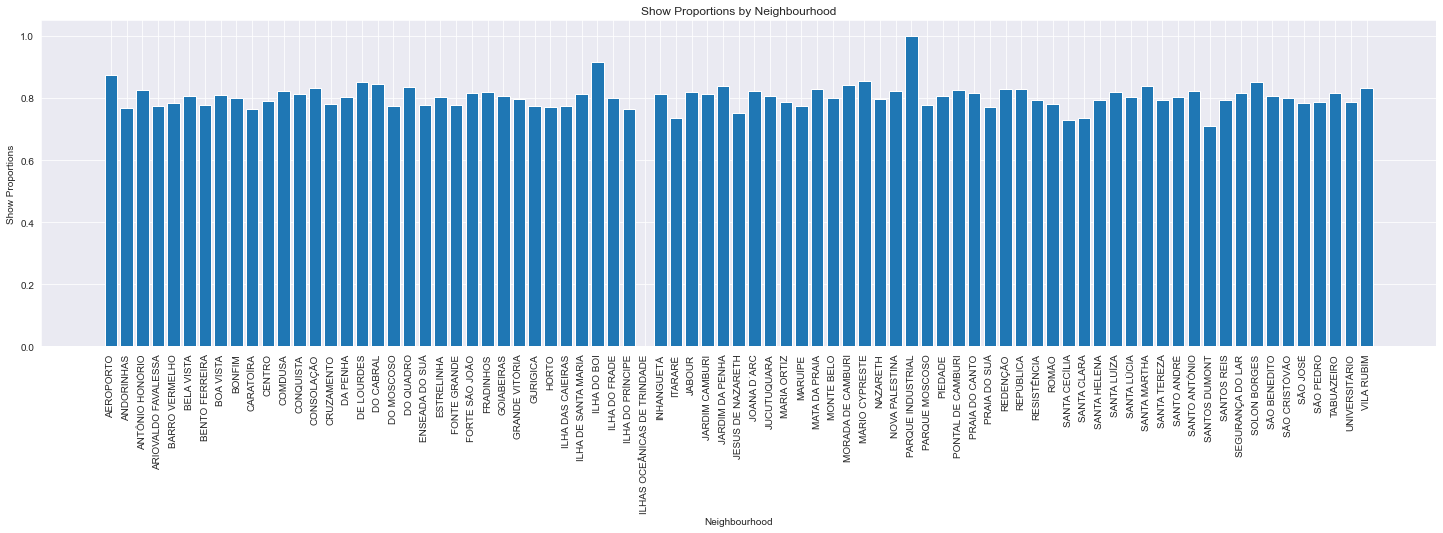

In [39]:
# Plot proportions
plt.figure(figsize=(25,6))
plt.bar(show_proportions.index, show_proportions)
plt.xticks(show_proportions.index, show_proportions.name, rotation='vertical')
plt.ylabel('Show Proportions')
plt.xlabel('Neighbourhood')
plt.title('Show Proportions by Neighbourhood');

We can see from the visualisation above that the show up rate is around 80% in most neighbourhoods. Therefore, neighbourhood might not be an important factor for our analysis.

#### 5)  Scholarship

In [40]:
print('Patients with a scholarship = {}, without = {}'.format(df[df.Scholarship == 1]['Age'].count(), df[df.Scholarship == 0]['Age'].count()))

Patients with a scholarship = 10809, without = 96178


Since there is a huge difference between the number of patients with a scholarship and those without, proportions will be used.

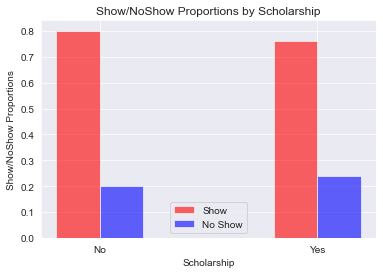

In [41]:
scholarship_show = ratio('No','Scholarship')

plot_proportion_bar('Scholarship', width)
plt.xticks(scholarship_show.index + width /2, ['No','Yes'])
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Scholarship')
plt.title('Show/NoShow Proportions by Scholarship')
plt.legend(['Show','No Show']);

Based on the visualisation above, we can see that:
- Out of the 96,178 patients without a scholarship, 80% have showed up to their scheduled appointments.
- 76% of the patients with a scholarship showed up to there appointment.

So it seems that patients without a scholarship had a higher show up rate than those with a scholarship. Therefore, scholarship might help us in determining if a patient will show up for their appointment.

#### 6) Hypertension

In [42]:
print('Patients with hypertension = {}, without = {}'.format(df[df.Hypertension == 1]['Age'].count(), df[df.Hypertension == 0]['Age'].count()))

Patients with hypertension = 21801, without = 85186


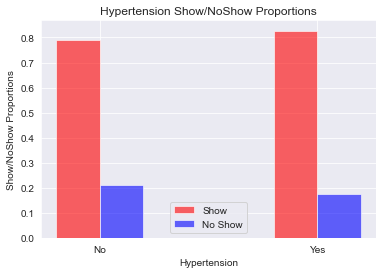

In [43]:
# Plot proportions
plot_proportion_bar('Hypertension', width)
plt.xticks(ratio('No','Hypertension').index + width /2, ['No','Yes'])
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Hypertension')
plt.title('Hypertension Show/NoShow Proportions')
plt.legend(['Show','No Show']);

It is clear from the visualisation above that the show up rate of patients with hypertension is higher than those without. Therefore, hypertension could be an important factor in determining the show up rate.

#### 7) Diabetes

In [44]:
print('Patients with diabetes = {}, without = {}'.format(df[df.Diabetes == 1]['Age'].count(), df[df.Diabetes == 0]['Age'].count()))

Patients with diabetes = 7943, without = 99044


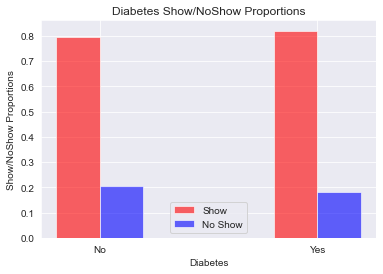

In [45]:
# Plot proportions
plot_proportion_bar('Diabetes', width)
plt.xticks(ratio('No','Diabetes').index + width /2, ['No','Yes'])
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Diabetes')
plt.title('Diabetes Show/NoShow Proportions')
plt.legend(['Show','No Show']);

Even though the sample of patients with diabetes is way lower than those without, the show up rates of diabetic patients was higher. Therefore, diabetes might be an important factor in determining patients’ show up rate.

#### 8) Alcoholism

As shown in <a href="#q2">Q2</a>, alcoholism did not have a correlation with show up rates.

#### 9) Handicap

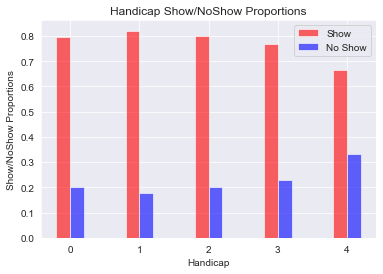

In [46]:
# Plot proportions
plot_proportion_bar('Handicap', width)
plt.xticks(ratio('No','Handicap').index + width /2, [0, 1, 2, 3, 4])
plt.ylabel('Show/NoShow Proportions')
plt.xlabel('Handicap')
plt.title('Handicap Show/NoShow Proportions')
plt.legend(['Show','No Show']);

Based on the visualisation above, we can see that:
- Patents with level 1 of handicap had the highest show up rate.
- Level 4 of handicap had the lowest show up rate with around 66% show rate.

Since there is a variation in the show/no-show rates of patients of different levels of handicap, it could be considered as an important factor in determining show up rates.

#### 10) SMS_received

As shown in <a href="#q1">Q1</a>, receiving SMS reminder messages did not make patients more likely to show up for their appointments. Therefore, it might not be an important factor to consider in our analysis.

<a id='conclusions'></a>
## Conclusions

### Findings
Based on our investigation throughout the report we can summarise our findings as following:
- Receiving an SMS reminder does not increase patients show up rate
- Alcoholism does not have a correlation with absenteeism
- The most important factors in predicting if a patient will show up for their appointment are: the appointment day of the week, age, scholarship, hypertension, diabetes and handicap.

### Limitations 
Throughout our exploration we found important factors that will help us in predicting if a patient will show up to their scheduled appointment. However, there are some limitations that might have affected our data:
- We had to drop the records with impossible age values, which could have resulted in losing some insights.
- The actual appointment time was not recorded and therefore we had to ignore the time of the appointment.  Knowing the time of the appointment could have helped us in finding more patterns with regards to what time of the day has the highest/lowest show up rates.
- The data is a bit imbalanced; in other words, there is an unequal distribution among some factors. For example, there are more females than males, the majority of patients are without a scholarship, etc. Having a balanced data set might help us in discovering more patterns and correlations between features.
